In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data_Analyst_Assignment_Dataset.csv')

In [3]:
df

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA
...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72


In [4]:
df.info

<bound method DataFrame.info of        Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number  
0              

In [5]:
df.dtypes

Amount Pending        int64
State                object
Tenure                int64
Interest Rate       float64
City                 object
Bounce String        object
Disbursed Amount      int64
Loan Number          object
dtype: object

In [6]:
df.nunique()

Amount Pending       1391
State                   7
Tenure                  9
Interest Rate         327
City                  186
Bounce String         413
Disbursed Amount     1476
Loan Number         24579
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24577    False
24578    False
24579    False
24580    False
24581    False
Length: 24582, dtype: bool

In [8]:
df.isnull()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
24577,False,False,False,False,False,False,False,False
24578,False,False,False,False,False,False,False,False
24579,False,False,False,False,False,False,False,False
24580,False,False,False,False,False,False,False,False


### Calculate the risk labels for all the borrowers.
* Unknown risk : New customers

* Low risk : Customers who have not bounced in the last 6 months

* Medium Risk : These are customers who have bounced at less than twice in the last 6 months - The bounce should not have occurred in the last month

* High risk : every other customer

In [9]:
df['Bounce String'].unique()

array(['SSS', 'SSB', 'BBS', 'SBB', 'BB', 'SS', 'BS', 'SB', 'S', 'B',
       'FEMI', 'LSSBBS', 'LSSSSS', 'LSBSSS', 'LBSSSS', 'BSSBBB', 'LSSBSB',
       'LBBSBB', 'LSSBSS', 'LSSSBB', 'LSBSBS', 'LBBBBB', 'LBSSBS',
       'LBBSSB', 'LSBBBS', 'LSBBSS', 'LSSSBS', 'LSHSSB', 'LBSBBS',
       'SSSSSB', 'SSSBSB', 'SSSSS', 'SBBBB', 'BBBSS', 'BBBBS', 'BBSSS',
       'SBSSS', 'BSSBB', 'SSBBS', 'BSSSB', 'SSSBS', 'BSSBS', 'SSSSB',
       'SHSSS', 'SSSBB', 'BSSSS', 'SSBSS', 'BBSB', 'BSBS', 'SSSS', 'BSSS',
       'SBBS', 'SSBS', 'SBBB', 'SSSB', 'SBSB', 'HBBS', 'SBSS', 'SBS',
       'BBB', 'LBBBSS', 'SSBSBB', 'LSSSSB', 'SSBSSB', 'SBBBS', 'SBSSB',
       'BSBBS', 'SBBSB', 'BSBBB', 'BBBSB', 'SBSBS', 'BSSB', 'BBBB',
       'HSSS', 'BBBS', 'LBSSSB', 'LSBBBB', 'BSBSB', 'LBBSSS', 'BBBBB',
       'BSBSS', 'BSBB', 'BBSS', 'BHSBS', 'SSBB', 'SSSSSSSB', 'LSSSSSSS',
       'HHLSHSSS', 'LLLSSSSS', 'LHLSSSSS', 'LBBBSSSB', 'BSSSSSBS',
       'LLLBBSSB', 'LHSSSSSS', 'LLLSBBSS', 'LSSBBBBB', 'SSSSSSSS',
       'LLSSSSS',

In [10]:
def risk_label(bounce_string):
    if 'FEMI' in bounce_string:
        return 'Unknown risk'
    
    bounce_count_last_6_months = bounce_string.count('B') + bounce_string.count('L')
    last_month_bounce = bounce_string[-1]
    
    if bounce_count_last_6_months == 0:
        return 'Low risk'
    elif bounce_count_last_6_months < 2 and last_month_bounce in ('S', 'H'):
        return 'Medium risk'
    else:
        return 'High risk'

df['Risk Label'] = df['Bounce String'].apply(risk_label)

print(df[['Loan Number', 'Risk Label']])


      Loan Number    Risk Label
0           JZ6FS      Low risk
1           RDIOY     High risk
2           WNW4L     High risk
3           6LBJS      Low risk
4           ZFZUA     High risk
...           ...           ...
24577       EAX5C  Unknown risk
24578       5MCE9  Unknown risk
24579       9HO4Q  Unknown risk
24580       3VV72  Unknown risk
24581       18XBC  Unknown risk

[24582 rows x 2 columns]


In [11]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low risk
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High risk
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High risk
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low risk
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High risk


### label all customers based on where they are in their tenure
* Early tenure : Customers who are in the book for 3 months
* Late tenure : Customers who are 3 months away from closing the loan
* Mid tenure : Everyone else

In [12]:
def calculate_tenure_progress(row):
   
    # Calculate months passed based on bounce string length
    months_passed = len(row['Bounce String']) 
    
    # Calculate progress as a proportion of total tenure
    progress = months_passed / row['Tenure']
    
    # Assigning labels based on tenure progress
    if progress <= 0.33:
        return 'Early Tenure'
    elif progress <= 0.66:
        return 'Mid Tenure'
    else:
        return 'Late Tenure'

# Apply the function row-wise to calculate tenure label and create a new column
df['Tenure Label'] = df.apply(calculate_tenure_progress, axis=1)

# Display the DataFrame to verify the results
print(df)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number    Risk Label  Tenure Label  
0               SSS

In [13]:
df['Tenure Label'].unique()

array(['Early Tenure', 'Mid Tenure', 'Late Tenure'], dtype=object)

### Segment borrowers based on ticket size
* Distribute the data into 3 cohorts based on ticket size. This is to be done such that sum of amount pending in each cohort should be approximately equal. Apply the following labels on each borrower based on this logic:
1. Low ticket size
2. Medium ticket size
3. High ticket size

In [14]:
def segment_borrowers(ticket_sizes):
   
    # Sort the ticket sizes
    sorted_ticket_sizes = sorted(ticket_sizes)
    
    # Calculate the size of each cohort
    cohort_size = len(ticket_sizes) // 3
    
    # Initialize labels list
    labels = []
    
    for i in range(len(ticket_sizes)):
        if i < cohort_size:
            labels.append('Low ticket size')
        elif i < 2 * cohort_size:
            labels.append('Medium ticket size')
        else:
            labels.append('High ticket size')
    
    return labels

ticket_sizes = df['Disbursed Amount']  

# Segment borrowers based on ticket size
df['Ticket Label'] = segment_borrowers(ticket_sizes)

print(df[['Amount Pending', 'Disbursed Amount', 'Ticket Label']])

       Amount Pending  Disbursed Amount      Ticket Label
0                 963             10197   Low ticket size
1                1194             12738   Low ticket size
2                1807             24640   Low ticket size
3                2451             23990   Low ticket size
4                2611             25590   Low ticket size
...               ...               ...               ...
24577             899              7192  High ticket size
24578            2699             21592  High ticket size
24579            1540             12320  High ticket size
24580             824              6592  High ticket size
24581            2254             24794  High ticket size

[24582 rows x 3 columns]


In [15]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Ticket Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low risk,Early Tenure,Low ticket size
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High risk,Early Tenure,Low ticket size
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High risk,Early Tenure,Low ticket size
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low risk,Early Tenure,Low ticket size
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High risk,Early Tenure,Low ticket size


### Give channel spend recommendations
* You are allowed to spend 3 kinds of resources to reduce the overall bounce

1. Whatsapp bot: This is the cheapest medium - it will cost 5 rupees per borrower 
2. Voice bot: This is the mid-cost - it will cost 10 rupees per borrower
3. Human calling: This is the costliest option - it will cost 50 rupees per borrower

* Whatsapp bot will work well in the following scenarios

1. Customers with great repayment behavior
2. Customers with first EMIs
3. Customers who have low EMIs

* Voice bot will work well in the following scenarios 

1. Customer who know Hindi or English - Metropolitan areas have high probability of english speakers & english speakers have typically lower interest rates
2. Customers who have had low bounce behaviour
3. Customers with low or medium sized EMIs

* Human calling will work on all scenarios but is the costliest option and you need to use this channel only where absolutely necessary

Your job is to segment the borrowers into these 3 channels of spend category and minimise the overall spend while maximise on time repayment.

In [16]:
def recommend_channel(row):
    # Define conditions for when no action is necessary
    high_risk_but_improving = row['Risk Label'] == 'High risk' and 'Improvement Indicator'  # Placeholder condition
    ahead_of_schedule = 'Ahead of Schedule Indicator'  # Placeholder condition
    high_engagement = 'High Engagement Indicator'  # Placeholder condition
    very_low_or_high_loan_amount = row['Amount Pending'] < 1000 or row['Amount Pending'] > 100000  # Example values
    excellent_repayment_history = 'Excellent Repayment History Indicator'  # Placeholder condition
    
    if high_risk_but_improving or ahead_of_schedule or high_engagement or very_low_or_high_loan_amount or excellent_repayment_history:
        return 'NILL', 0
    elif row['Risk Label'] == 'Low risk' or row['Bounce String'] == 'FEMI' or row['Amount Pending'] <= emi_thresholds['low']:
        return 'WhatsApp Bot', 5
    elif row['Interest Rate'] < 0.09 or row['Ticket Label'] == 'Low' or (row['Amount Pending'] > emi_thresholds['low'] and row['Amount Pending'] <= emi_thresholds['medium']):
        return 'Voice Bot', 10
    else:
        return 'Human Calling', 50

# Note: 'Improvement Indicator', 'Ahead of Schedule Indicator', 'High Engagement Indicator', and 'Excellent Repayment History Indicator' are placeholders. You need to define these based on your dataset's actual columns and values.

# Apply the function to segment the customers
df['Recommend Channel'], df['Cost'] = zip(*df.apply(recommend_channel, axis=1))


In [17]:
# Adjusting the recommend_channel function to include a 'NILL' condition

def recommend_channel(row):
    # Condition for no recommendation needed
    if 'S' in row['Bounce String'] and len(row['Bounce String']) > 5:  # Example for excellent repayment history
        return 'NILL', 0
    elif row['Risk Label'] == 'Low risk' or row['Bounce String'] == 'FEMI' or row['Amount Pending'] <= emi_thresholds['low']:
        return 'WhatsApp Bot', 5
    elif row['Interest Rate'] < 0.09 or row['Ticket Label'] == 'Low' or (row['Amount Pending'] > emi_thresholds['low'] and row['Amount Pending'] <= emi_thresholds['medium']):
        return 'Voice Bot', 10
    else:
        return 'Human Calling', 50

# Example condition for no action needed could be customers with very high risk or high EMIs where none of the interventions are considered effective
# For the sake of an example, let's say customers with 'High risk' and 'Amount Pending' greater than the 'medium' threshold don't get any recommendation
# Adjust the below line in the function above as your new first condition
    if row['Risk Label'] == 'High risk' and row['Amount Pending'] > emi_thresholds['Mid Tenure']:  # Example condition

# Apply the function to segment the customers
        df['Recommend Channel'], df['Cost'] = zip(*df.apply(recommend_channel, axis=1))

# Recalculate total costs
total_cost_whatsapp = df[df['Recommend Channel'] == 'WhatsApp Bot']['Cost'].sum()
total_cost_voice = df[df['Recommend Channel'] == 'Voice Bot']['Cost'].sum()
total_cost_human_calling = df[df['Recommend Channel'] == 'Human Calling']['Cost'].sum()
total_cost_nill = df[df['Recommend Channel'] == 'NILL']['Cost'].sum()  # Cost for NILL will be 0

# Calculate total cost again
total_cost = df['Cost'].sum()

# Print separate total costs for each recommended channel and the NILL segment
print("Total Cost for WhatsApp Bot: ", total_cost_whatsapp)
print("Total Cost for Voice Bot: ", total_cost_voice)
print("Total Cost for Human Calling: ", total_cost_human_calling)
print("Total Cost for NILL: ", total_cost_nill)  # This should be 0
print("Overall Total Cost:", total_cost)

print(df)

Total Cost for WhatsApp Bot:  0
Total Cost for Voice Bot:  0
Total Cost for Human Calling:  0
Total Cost for NILL:  0
Overall Total Cost: 0
       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Prade

In [18]:
df['Recommend Channel'].unique()

array(['NILL'], dtype=object)

### 1. summary of borrowers (with graphs) based on risk

In [19]:
# Summary of borrowers by risk
summary_by_risk = df['Risk Label'].value_counts()
print(summary_by_risk)

Low risk        13463
High risk        5449
Unknown risk     3222
Medium risk      2448
Name: Risk Label, dtype: int64


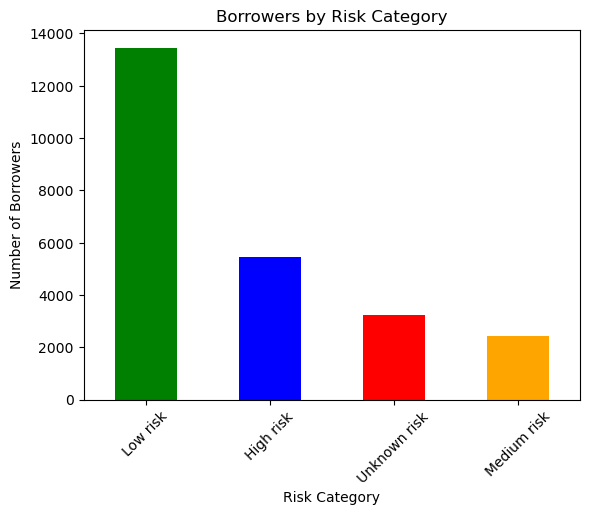

In [20]:
summary_by_risk.plot(kind='bar', color=['green', 'blue', 'red', 'orange'])
plt.title('Borrowers by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()

### 2. summary of borrowers (with graphs) based on ticket sizes

In [21]:
# Summarize the data
summary = df['Ticket Label'].value_counts()

print(summary)

Low ticket size       8194
Medium ticket size    8194
High ticket size      8194
Name: Ticket Label, dtype: int64


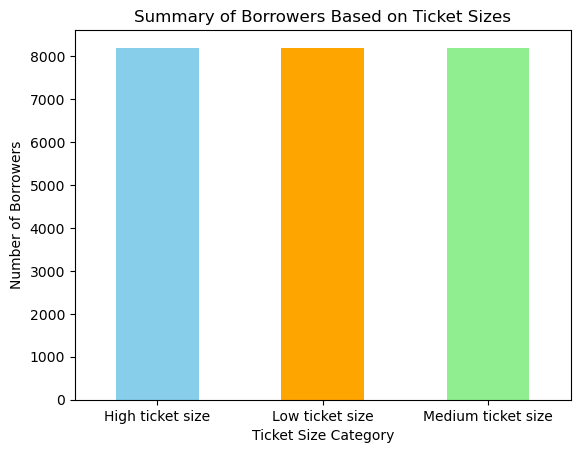

In [22]:
# Plotting
summary.sort_index().plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Summary of Borrowers Based on Ticket Sizes')
plt.xlabel('Ticket Size Category')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)  
plt.show()

### 3. Summary of borrowers (with graphs) based on tenure completion

In [23]:
# Summarize the data
summary = df['Tenure Label'].value_counts()

print(summary)

Mid Tenure      11352
Early Tenure    10579
Late Tenure      2651
Name: Tenure Label, dtype: int64


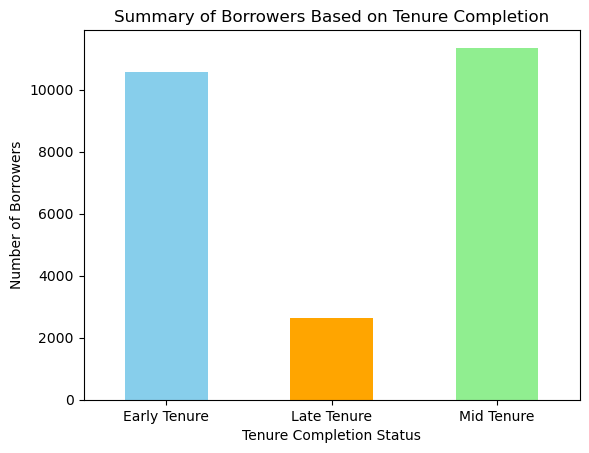

In [24]:
# Plotting
summary.sort_index().plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Summary of Borrowers Based on Tenure Completion')
plt.xlabel('Tenure Completion Status')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)  
plt.show()

### 4. Spend recommendation - you need to articulate on how you have minimised spend while keeping in mind high repayment rate

### 5. Any other interesting insights you have derived from the above data.